In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
u = mda.Universe('IRMOF.pdb')

In [3]:
data = open('irmofcharges.out').readlines()

In [4]:
data[0].split()

['Zn1', 'Zn', '0.293400046', '0.206599954', '0.206599954', '1.333']

Columns are:  
  - Type
  - Element
  - x, y, z
  - Charge

In [5]:
def nameconv(name):
    if name.startswith('Z'):
        return 'Zn'
    elif name.startswith('H'):
        return 'H'
    else:
        return name

In [6]:
types = [nameconv(l.split()[0]) for l in data]
charges = [float(l.split()[-1]) for l in data]

In [7]:
u.atoms.types = types * 8
u.atoms.names = types * 8
u.atoms.charges = charges * 8

In [8]:
set(u.atoms.types)

{'C1', 'C2', 'C3', 'H', 'O1', 'O2', 'Zn'}

In [9]:
for attype in set(u.atoms.types):
    print attype, set(u.select_atoms('type {}'.format(attype)).charges)


Zn set([1.333])
H set([0.16200000000000001])
C3 set([-0.16700000000000001])
C2 set([0.106])
C1 set([0.55800000000000005])
O2 set([-0.64100000000000001])
O1 set([-1.5640000000000001])


In [10]:
Crad = mda.topology.tables.vdwradii['C']
Orad = mda.topology.tables.vdwradii['O']

vdwrad = {}
vdwrad['C1'] = vdwrad['C2'] = vdwrad['C3'] = Crad
vdwrad['O1'] = vdwrad['O2'] = Orad
vdwrad['Zn'] = 2.42

In [11]:
u.atoms.guess_bonds(vdwradii=vdwrad)

In [12]:
u.atoms.bonds.types()

[('C3', 'H'),
 ('Zn', 'O2'),
 ('C1', 'O2'),
 ('Zn', 'O1'),
 ('C3', 'C3'),
 ('Zn', 'Zn'),
 ('C2', 'C3'),
 ('C1', 'C2')]

In [13]:
for t in u.atoms.bonds.types():
    tg = u.bonds.select_bonds(t)
    print t, tg.values().mean(), tg.values().std()

('C3', 'H') 0.926656812337 8.16028758564e-07
('Zn', 'O2') 1.92244466304 6.28669272739e-07
('C1', 'O2') 1.30435726031 1.47018680115e-06
('Zn', 'O1') 1.94162894124 1.1418608067e-06
('C3', 'C3') 1.39000034332 7.78671818664e-07
('Zn', 'Zn') 3.17066678391 7.81707522503e-07
('C2', 'C3') 1.38853360568 1.17024570397e-06
('C1', 'C2') 1.48499970138 1.26712451567e-06


In [14]:
for t in u.atoms.angles.types():
    tg = u.angles.select_bonds(t)
    print t, tg.values().mean(), tg.values().std()

('O1', 'Zn', 'O2') 1.96601629145 6.87169955646e-07
('Zn', 'Zn', 'Zn') 1.0471975512 2.46543622523e-07
('C3', 'C2', 'C3') 2.09317509073 1.58557992129e-06
('O2', 'Zn', 'Zn') 1.91050243956 0.39595565456
('C2', 'C1', 'O2') 2.03673735126 1.06346992069e-06
('O2', 'C1', 'O2') 2.20971060465 1.88309755011e-06
('C1', 'O2', 'Zn') 2.25699709528 1.281498759e-06
('C2', 'C3', 'H') 2.09543945155 1.71289948934e-06
('C1', 'C2', 'C3') 2.09500510822 8.82092773712e-07
('Zn', 'O1', 'Zn') 1.91063323625 9.88083624659e-07
('C2', 'C3', 'C3') 2.0950047877 4.13288115385e-07
('H', 'C3', 'C3') 2.0927405174 1.09467158028e-06
('O2', 'Zn', 'O2') 1.85214292875 6.24954676241e-07
('O1', 'Zn', 'Zn') 0.615479708671 5.88094160558e-07


<IPython.core.display.Javascript object>


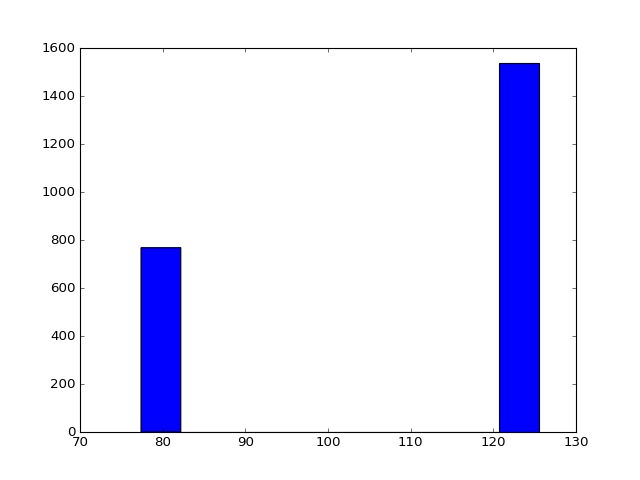

(array([  768.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1536.]),
 array([  77.38001452,   82.19257582,   87.00513711,   91.8176984 ,
          96.6302597 ,  101.44282099,  106.25538228,  111.06794357,
         115.88050487,  120.69306616,  125.50562745]),
 <a list of 10 Patch objects>)

In [15]:
import numpy as np
tg = u.angles.select_bonds(('O2', 'Zn', 'Zn'))
plt.hist(np.rad2deg(tg.values()))

In [16]:
u.dimensions = [51.664] * 3 + [90.0] * 3

In [17]:
u.atoms.write('withbonds.pdb', bonds='all')